In [10]:
import pandas as pd

In [16]:
file_path = r"C:\Users\eppal\Downloads\archive (2)\realistic_e_commerce_sales_data.csv"
data = pd.read_csv(file_path)


In [18]:
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


(None,
   Customer ID  Gender Region   Age Product Name     Category  Unit Price  \
 0    CUST0268    Male  North   NaN      Monitor  Electronics       300.0   
 1    CUST0046    Male   West  22.0   Headphones  Accessories       100.0   
 2    CUST0169  Female  South  54.0      Monitor  Electronics       300.0   
 3    CUST0002    Male  North  23.0   Headphones  Accessories       100.0   
 4    CUST0173  Female  South   NaN       Laptop  Electronics      1500.0   
 
    Quantity  Total Price  Shipping Fee Shipping Status  Order Date  
 0         5         1500         13.31        Returned  2023-12-08  
 1         2          200          6.93      In Transit  2023-04-09  
 2         1          300         11.31        Returned  2023-08-28  
 3         5          500         12.22       Delivered  2023-01-18  
 4         3         4500          5.40       Delivered  2023-01-19  )

In [24]:
# Handle missing values
data['Region'] = data['Region'].fillna('Unknown')  # Fill missing regions with 'Unknown'
data['Age'] = data['Age'].fillna(data['Age'].median())  # Replace missing ages with median value
data['Shipping Status'] = data['Shipping Status'].fillna('Unknown')  # Replace missing statuses with 'Unknown'

# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Add a 'Month' column for trend analysis
data['Month'] = data['Order Date'].dt.to_period('M')

# Verify data after cleaning
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      1000 non-null   object        
 1   Gender           1000 non-null   object        
 2   Region           1000 non-null   object        
 3   Age              1000 non-null   float64       
 4   Product Name     1000 non-null   object        
 5   Category         1000 non-null   object        
 6   Unit Price       1000 non-null   float64       
 7   Quantity         1000 non-null   int64         
 8   Total Price      1000 non-null   int64         
 9   Shipping Fee     1000 non-null   float64       
 10  Shipping Status  1000 non-null   object        
 11  Order Date       1000 non-null   datetime64[ns]
 12  Month            1000 non-null   period[M]     
dtypes: datetime64[ns](1), float64(3), int64(2), object(6), period[M](1)
memory usage: 101.7+ KB


(None,
   Customer ID  Gender Region   Age Product Name     Category  Unit Price  \
 0    CUST0268    Male  North  49.0      Monitor  Electronics       300.0   
 1    CUST0046    Male   West  22.0   Headphones  Accessories       100.0   
 2    CUST0169  Female  South  54.0      Monitor  Electronics       300.0   
 3    CUST0002    Male  North  23.0   Headphones  Accessories       100.0   
 4    CUST0173  Female  South  49.0       Laptop  Electronics      1500.0   
 
    Quantity  Total Price  Shipping Fee Shipping Status Order Date    Month  
 0         5         1500         13.31        Returned 2023-12-08  2023-12  
 1         2          200          6.93      In Transit 2023-04-09  2023-04  
 2         1          300         11.31        Returned 2023-08-28  2023-08  
 3         5          500         12.22       Delivered 2023-01-18  2023-01  
 4         3         4500          5.40       Delivered 2023-01-19  2023-01  )

In [26]:
# Basic EDA: Key Metrics and Groupings

# Total sales and average sales per order
total_sales = data['Total Price'].sum()
average_sales = data['Total Price'].mean()

# Top 5 products by total sales
top_products = data.groupby('Product Name')['Total Price'].sum().nlargest(5)

# Total sales by region
sales_by_region = data.groupby('Region')['Total Price'].sum()

# Sales trend over months
monthly_sales = data.groupby('Month')['Total Price'].sum()

# Results
{
    "Total Sales": total_sales,
    "Average Sales per Order": average_sales,
    "Top 5 Products": top_products,
    "Sales by Region": sales_by_region,
    "Monthly Sales": monthly_sales,
}


{'Total Sales': 1346600,
 'Average Sales per Order': 1346.6,
 'Top 5 Products': Product Name
 Laptop        696000
 Smartphone    353600
 Monitor       150900
 Smartwatch     74200
 Headphones     37000
 Name: Total Price, dtype: int64,
 'Sales by Region': Region
 East       329950
 North      324990
 South      301040
 Unknown     67230
 West       323390
 Name: Total Price, dtype: int64,
 'Monthly Sales': Month
 2023-01    141360
 2023-02     78910
 2023-03     67660
 2023-04     87840
 2023-05    120080
 2023-06    129450
 2023-07    103160
 2023-08    108050
 2023-09    119490
 2023-10    118240
 2023-11    147150
 2023-12    113830
 2024-01     11380
 Freq: M, Name: Total Price, dtype: int64}

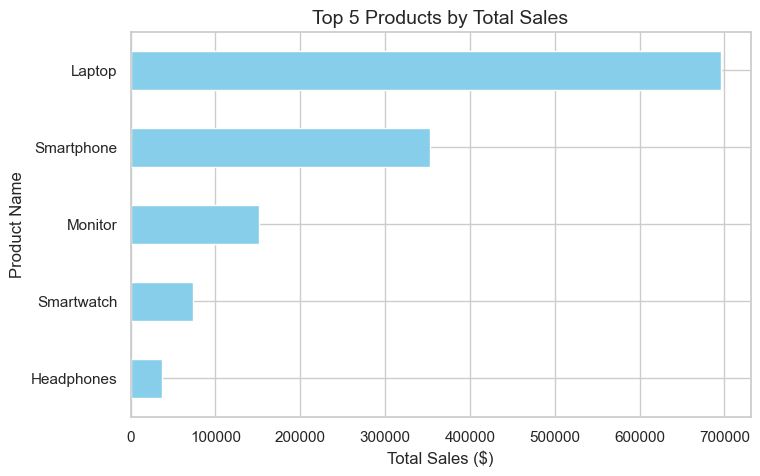

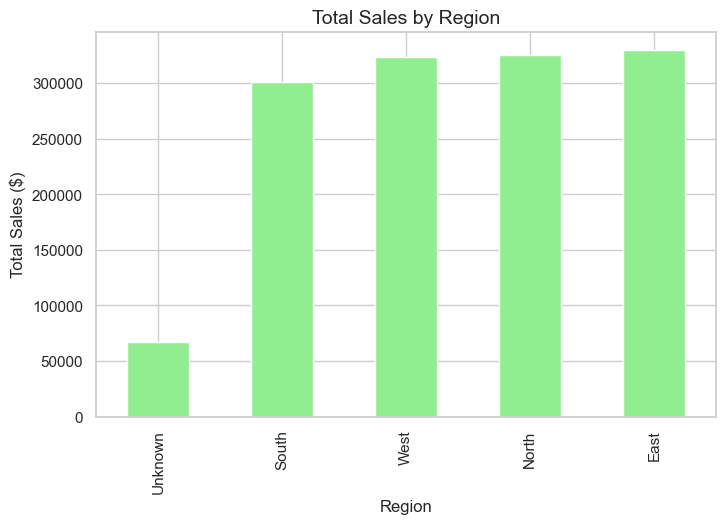

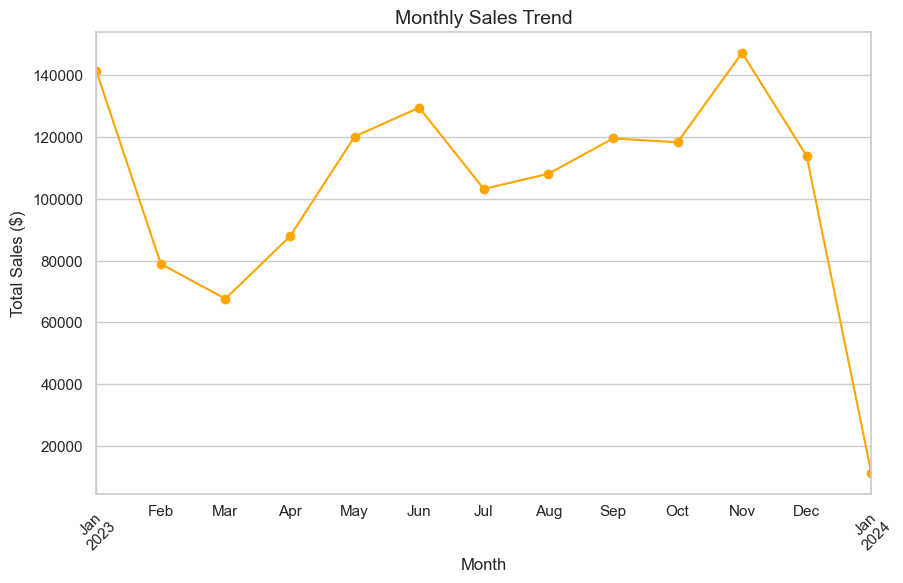

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
sns.set(style="whitegrid")

# Visualize top 5 products
plt.figure(figsize=(8, 5))
top_products.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 5 Products by Total Sales', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

# Visualize sales by region
plt.figure(figsize=(8, 5))
sales_by_region.sort_values().plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.show()

# Visualize monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [30]:
# 1. Customer Behavior Analysis

# Total spending by customer
top_customers = data.groupby('Customer ID')['Total Price'].sum().nlargest(5)

# Average spending per customer
avg_spending_per_customer = data.groupby('Customer ID')['Total Price'].mean()

# Frequency of orders by customer
order_frequency = data['Customer ID'].value_counts().head(5)

# Compile results
customer_behavior = {
    "Top 5 Customers (by spending)": top_customers,
    "Average Spending Per Customer (sample)": avg_spending_per_customer.head(5),
    "Top 5 Customers (by order frequency)": order_frequency,
}

customer_behavior


{'Top 5 Customers (by spending)': Customer ID
 CUST0204    29100
 CUST0095    22440
 CUST0131    21180
 CUST0139    18350
 CUST0281    17850
 Name: Total Price, dtype: int64,
 'Average Spending Per Customer (sample)': Customer ID
 CUST0001    3075.000000
 CUST0002     516.666667
 CUST0003    1630.000000
 CUST0004    1300.000000
 CUST0005      60.000000
 Name: Total Price, dtype: float64,
 'Top 5 Customers (by order frequency)': Customer ID
 CUST0204    9
 CUST0095    9
 CUST0052    9
 CUST0044    9
 CUST0201    8
 Name: count, dtype: int64}

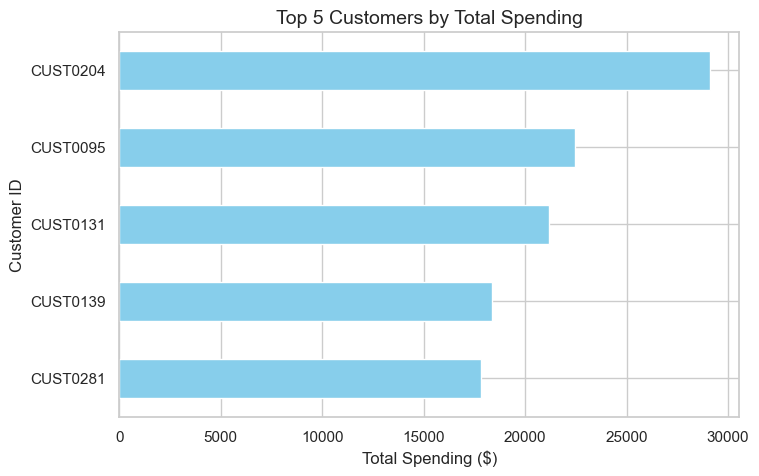

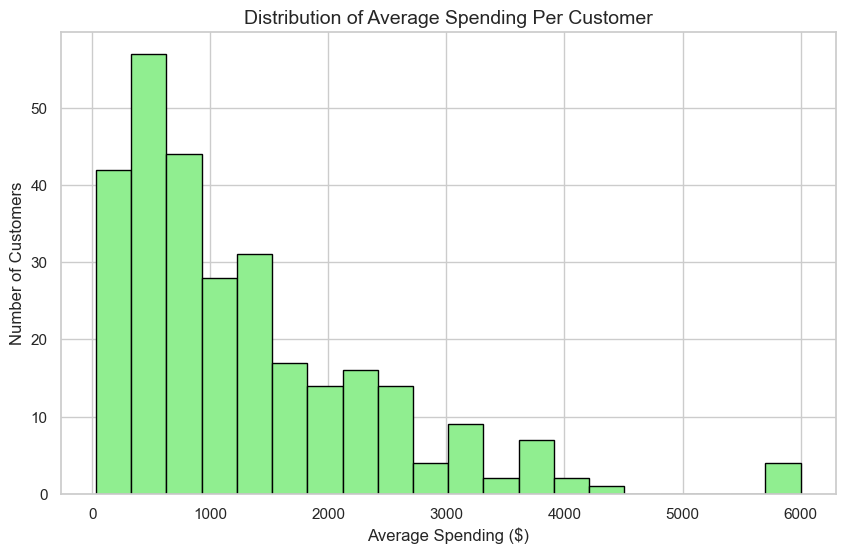

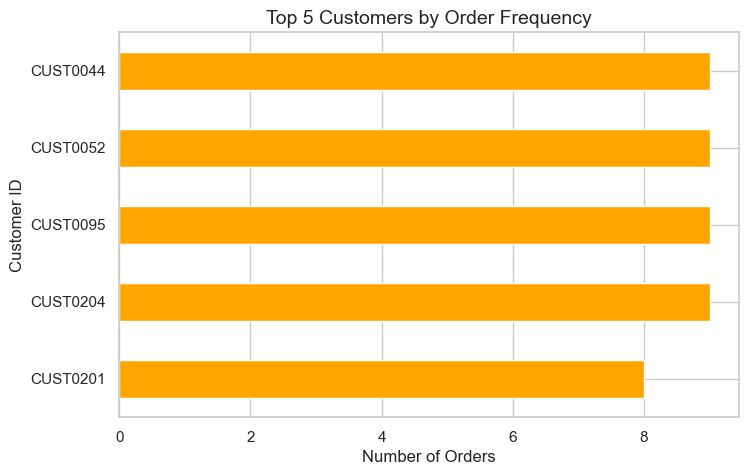

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
sns.set(style="whitegrid")

# Top 5 Customers by Spending
plt.figure(figsize=(8, 5))
top_customers.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 5 Customers by Total Spending', fontsize=14)
plt.xlabel('Total Spending ($)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.show()

# Average Spending Per Customer (Distribution)
plt.figure(figsize=(10, 6))
avg_spending_per_customer.hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Average Spending Per Customer', fontsize=14)
plt.xlabel('Average Spending ($)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

# Top 5 Customers by Order Frequency
plt.figure(figsize=(8, 5))
order_frequency.sort_values().plot(kind='barh', color='orange')
plt.title('Top 5 Customers by Order Frequency', fontsize=14)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.show()
